In [2]:
import pandas as pd

In [3]:
dt=pd.read_excel("StockData.xlsx",index_col='Date',parse_dates=True)

In [4]:
dt.head()

,Index,Open_AAPL,High_AAPL,Low_AAPL,Close_AAPL,Adj Close_AAPL,Volume_AAPL,Open_MSFT,High_MSFT,Low_MSFT,...,Low_GOOGL,Close_GOOGL,Adj Close_GOOGL,Volume_GOOGL,Open_AMZN,High_AMZN,Low_AMZN,Close_AMZN,Adj Close_AMZN,Volume_AMZN
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-02,0,27.847500,27.860001,26.837500,27.332500,24.498682,212818400,46.660000,47.419998,46.540001,...,26.393999,26.477501,26.477501,26480000,15.6290,15.7375,15.3480,15.4260,15.4260,55664000
2015-01-05,1,27.072500,27.162500,26.352501,26.562500,23.808514,257142000,46.369999,46.730000,46.250000,...,25.887501,25.973000,25.973000,41182000,15.3505,15.4190,15.0425,15.1095,15.1095,55484000
2015-01-06,2,26.635000,26.857500,26.157499,26.565001,23.810751,263188400,46.380001,46.750000,45.540001,...,25.277500,25.332001,25.332001,54456000,15.1120,15.1500,14.6190,14.7645,14.7645,70380000
2015-01-07,3,26.799999,27.049999,26.674999,26.937500,24.144638,160423600,45.980000,46.459999,45.490002,...,25.182501,25.257500,25.257500,46918000,14.8750,15.0640,14.7665,14.9210,14.9210,52806000
2015-01-08,4,27.307501,28.037500,27.174999,27.972500,25.072330,237458000,46.750000,47.750000,46.720001,...,24.750999,25.345501,25.345501,73054000,15.0160,15.1570,14.8055,15.0230,15.0230,61768000


In [6]:
dt_AAPL=dt[["Open_AAPL","High_AAPL","Low_AAPL","Adj Close_AAPL","Volume_AAPL","Close_AAPL"]]

In [7]:
dt_AAPL.head()

,Open_AAPL,High_AAPL,Low_AAPL,Adj Close_AAPL,Volume_AAPL,Close_AAPL
Date,,,,,,
2015-01-02,27.847500,27.860001,26.837500,24.498682,212818400,27.332500
2015-01-05,27.072500,27.162500,26.352501,23.808514,257142000,26.562500
2015-01-06,26.635000,26.857500,26.157499,23.810751,263188400,26.565001
2015-01-07,26.799999,27.049999,26.674999,24.144638,160423600,26.937500
2015-01-08,27.307501,28.037500,27.174999,25.072330,237458000,27.972500


In [10]:
dt_AAPL.isnull().sum().sum()

0

<Axes: xlabel='Date'>

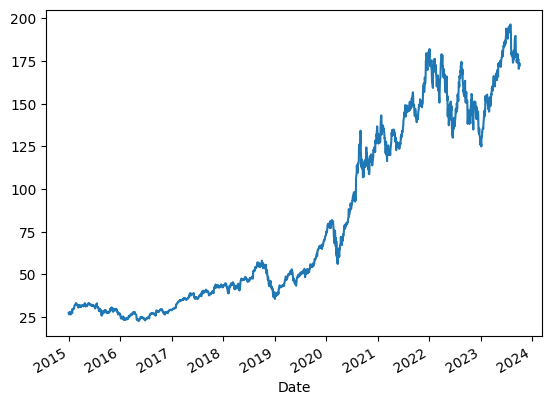

In [11]:
dt_AAPL['Close_AAPL'].plot()

In [8]:
target = pd.DataFrame(dt_AAPL['Close_AAPL'])

In [9]:
features = ["Open_AAPL", "High_AAPL", "Low_AAPL", "Volume_AAPL"]

In [10]:
from sklearn.preprocessing import MinMaxScaler

In [11]:
scaler = MinMaxScaler()

In [12]:
feature_transform = scaler.fit_transform(dt_AAPL[features])
feature_transform= pd.DataFrame(columns=features, data=feature_transform, index=dt_AAPL.index)

In [13]:
feature_transform.head()

,Open_AAPL,High_AAPL,Low_AAPL,Volume_AAPL
Date,,,,
2015-01-02,0.030779,0.028193,0.025851,0.293764
2015-01-05,0.026318,0.024214,0.023046,0.365559
2015-01-06,0.023800,0.022474,0.021919,0.375352
2015-01-07,0.024750,0.023572,0.024911,0.208896
2015-01-08,0.027671,0.029205,0.027803,0.333675


In [14]:
from sklearn.model_selection import TimeSeriesSplit

In [15]:
timesplit= TimeSeriesSplit(n_splits=10)

In [16]:
for train_index, test_index in timesplit.split(feature_transform):
        X_train, X_test = feature_transform[:len(train_index)], feature_transform[len(train_index): (len(train_index)+len(test_index))]
        y_train, y_test = target[:len(train_index)].values.ravel(), target[len(train_index): (len(train_index)+len(test_index))].values.ravel()

In [25]:
import numpy as np

In [26]:
trainX =np.array(X_train)
testX =np.array(X_test)
X_train = trainX.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = testX.reshape(X_test.shape[0], 1, X_test.shape[1])

In [32]:
import keras

In [36]:
pip install tensorflow


In [37]:
from keras.models import Sequential
from keras.layers import Dense

In [40]:
from keras.layers import LSTM

In [38]:
lstm = Sequential()

In [41]:
lstm.add(LSTM(32, input_shape=(1, trainX.shape[1]), activation='relu', return_sequences=False))
lstm.add(Dense(1))

In [43]:
lstm.compile(loss='mean_squared_error', optimizer='adam')

In [44]:
history=lstm.fit(X_train, y_train, epochs=100, batch_size=8, verbose=1, shuffle=False)

Epoch 1/100
251/251 [==============================] - 2s 2ms/step - loss: 7112.1812
Epoch 2/100
251/251 [==============================] - 1s 2ms/step - loss: 6033.2686
Epoch 3/100
251/251 [==============================] - 1s 2ms/step - loss: 4565.8926
Epoch 4/100
251/251 [==============================] - 1s 2ms/step - loss: 3026.8811
Epoch 5/100
251/251 [==============================] - 1s 2ms/step - loss: 1759.0717
Epoch 6/100
251/251 [==============================] - 1s 2ms/step - loss: 921.5465
Epoch 7/100
251/251 [==============================] - 1s 2ms/step - loss: 477.0488
Epoch 8/100
251/251 [==============================] - 1s 2ms/step - loss: 279.9868
Epoch 9/100
251/251 [==============================] - 1s 2ms/step - loss: 193.3866
Epoch 10/100
251/251 [==============================] - 1s 2ms/step - loss: 136.0659
Epoch 11/100
251/251 [==============================] - 1s 2ms/step - loss: 86.1084
Epoch 12/100
251/251 [==============================] - 1s 2ms/step - 

In [45]:
y_pred= lstm.predict(X_test)

7/7 [==============================] - 0s 2ms/step


In [21]:
import matplotlib.pyplot as plt

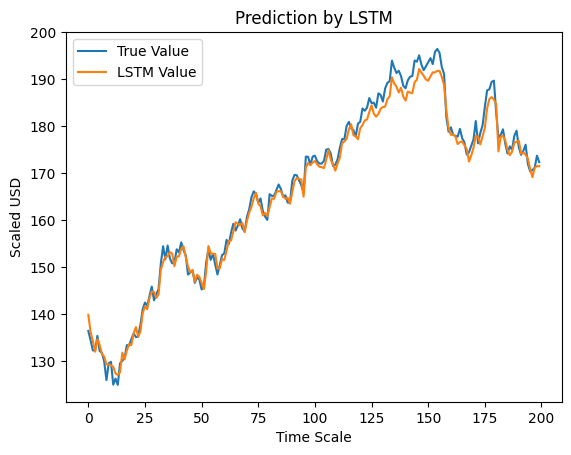

In [48]:
plt.plot(y_test, label='True Value')
plt.plot(y_pred, label='LSTM Value')
plt.title('Prediction by LSTM')
plt.xlabel('Time Scale')
plt.ylabel('Scaled USD')
plt.legend()
plt.show()

In [17]:
from sklearn.linear_model import LinearRegression

In [18]:
LR=LinearRegression()

In [19]:
LR.fit(X_train,y_train)

LinearRegression()

In [20]:
pred_LR=LR.predict(X_test)

In [23]:
from sklearn.metrics import mean_squared_error

In [25]:
mse = mean_squared_error(y_test, pred_LR)

In [26]:
print(mse)

0.7139459594497931


In [27]:
from sklearn.tree import DecisionTreeRegressor

In [28]:
reg=DecisionTreeRegressor()

In [31]:
reg.fit(X_train,y_train)

DecisionTreeRegressor()

In [32]:
pred_DT=reg.predict(X_test)

In [33]:
mse = mean_squared_error(y_test, pred_DT)

In [34]:
print(mse)

26.973151179973264
